# <div dir=rtl> תרגול אחת עשרה - Neural Networks: Perceptron & Multilayered Perceptron </div>

<div dir=rtl>
     
</div>

<div dir=rtl>
    בתרגול זה נכיר מודל אחד של רשת נוירונים - מודל פרספטרון רב שכבתי. נראה תחילה דוגמה לרשת כזו המכילה 12 אינפוטים, שתי שכבות נסתרות עם חמישה נוירונים כל אחת ושכבת אאוטפוט עם שני נוירונים:
</div>

![](https://www.kdnuggets.com/wp-content/uploads/strika-1-fig_neural_network_1.png)

<div dir=rtl>
    לפני שנבין מה הרשת עושה, נתמקד תחילה באבן היסוד שלה - הפרספטרון:
</div>

![](https://www.allaboutcircuits.com/uploads/articles/how-to-train-a-basic-perceptron-neural-network_rk_aac_image1.jpg)

<div dir=rtl>
    הפרספטרון הוא למעשה פונקציה המכילה פרמטרים. בהינתן אינפוט, הפרספטרון כופל את הפרמטרים באינפוטים, סוכם, מחיל פונקציה כלשהי על התוצאה ופולט מספר אחד ויחיד בתור פלט:
</div>

\begin{align}
Z = w_0 + a_1 \cdot w_1 + a_2 \cdot w_2 = W \cdot A\\
output_0 = f(Z)\\
f(x) = \sigma (x) \\ \\
Z > 0 \rightarrow output_0 > 0.5 \\ 
Z < 0 \rightarrow output_0 < 0.5
\end{align}

<div dir=rtl>
    מהמשוואות למעלה אנחנו מבינים שאת הסכימה ניתן לבטא ככפל מטריצה בווקטור. <br />
    כאשר מחילים פונקציה מסוג סיגמואיד (כמו שמוצג באיור) הנוירון יצביע על הסתברות גדולה מחצי אם תוצאת הסכימה גדולה מ0, ועל הסתברות קטנה מחצי אם תוצאת הסכימה קטנה מאפס.
    <br />
    נראה מוכר? זה בדיוק המשוואות של רגרסיה לוגיסטית.
</div>

## <div dir=rtl> שאלה 1</div>
<div dir=rtl>
    א. נותונים דאטא בקובץ 11_data_1.csv. טענו את הקובץ ושרטטו את הנתונים.
</div>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data1 = pd.read_csv('11_data_1.csv')
display(data1.sample(5))
print(data1.shape)

In [ ]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'axes.grid':True,
         'axes.grid.which':'both'
         }
plt.rcParams.update(params)

data1.plot.scatter(
    x='x',
    y='y',
    c='class',
    cmap='jet',
    sharex=False,
    s=100
)

<div dir=rtl>
    ב. מצאו בעזרת מודל הפרספטרון מפריד לינארי להפרדה בין שתי המחלקות.
</div>

<div dir=rtl>
    נכיר את הפרקטיקה מאחורי רשתות נוירונים. בעולם הזה קיימות שתי ספריות לפייתון: TensorFlow מבית גוגל ו PyTorch מבית פייסבוק.
    <br />
    אנחנו נכיר את הספרייה PyTorch המייצגת איזון "טוב" בין נוחות ושקיפות של המודל.
    <br />
    נבנה מודל פרספטרון אחד - רשת לינארית למעבר משני אינפוטים לאאוטפוט אחד ופונקצית סיגמואיד.
</div>

In [ ]:
import torch
import torch.nn as nn
from torchsummary import summary

model = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)


mse_loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1)

summary(model,(40,2))

<div dir=rtl>
    למעלה מוצג המודל. נשים לב שאחרי שהגדרנו את המודל, הגדרנו מה תהיה השגיאה - שגיאת L2 רגילה - ואיך נבצע את הצעדים במורד הגרדיאנט - על ידי Stochastic Gradient Descent.
    <br />
    כל שנותר הוא לאמן:
</div>

In [ ]:
losses = list()

model.train()

input_tensor = torch.Tensor(
    data1[['x','y']].values
)
target = torch.Tensor(
    data1['class'].values
)

for epoch in range(100):
    output = model(input_tensor)

    loss = mse_loss(output.view(-1), target)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    losses.append(loss.item())

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('L2 Loss')


<div dir=rtl>
    מעבר אחד על כל הדאטא לרוב מוגדר בתור אפוק. לכל אפוק נבקש פרדיקציות מהמודל. נשווה את הפרדיקציות לליבלים ונמצא מה השגיאה. פייטורצ' יודעת לחשב עבורינו את הגרדיאנטים של המודל (backward) ולבצע צעד במורד הגרדיאנט (step). 
</div>
<div dir=rtl>
    ננסה להבין מה המודל מצא באמצעות הטבלה למטה. 
</div>


In [ ]:
pd.concat(
    [
        data1['class'],
        pd.DataFrame(output.detach().numpy(), columns=["model output"])
    ],
    axis=1
).sample(5)

<div dir=rtl>
    נשים לב שלכל דגימה יש הסתברות. נאמר שאם ההסבתרות גדולה מ0.5 הדגימה שייכת למחלקה 1, אחרת - 0. 
</div>

<div dir=rtl>
    לבסוף נמצא את המפריד הלינארי.
</div>

In [ ]:
import numpy as np

def return_line(weight,b):
    ax, ay = weight.detach().squeeze().numpy() #get coeffs
    b = b.item()
    xs = np.arange(-2, 2, 0.1)

    ys = (-1 * ax * xs - b) / ay

    return xs, ys

data1.plot.scatter(
    x='x',
    y='y',
    c='class',
    cmap='jet',
    sharex=False,
    s=100
)

xs,ys = return_line(
    model._modules['0'].weight,
    model._modules['0'].bias
)
plt.plot(xs,ys)

## <div dir=rtl> שאלה 2</div>


<div dir=rtl>
    א. נתונים דאטא בקובץ 11_data2.csv. באופן דומה לשאלה 1 - שרטטו את הנתונים ומצאו מפריד לינארי לסיווג בין המחלקות.
</div>

In [ ]:
data2 = pd.read_csv('11_data_2.csv')
data2.plot.scatter(
    x='x',
    y='y',
    c='class',
    cmap='jet',
    sharex=False,
    s=100
)

<div dir=rtl>
    נשים לב לפיזור של המחלקות במישור. הפיזור הולך לפי החיוביות או השליליות של הצירים, רק עם רעש. פיזור כזה נוצר על ידי פונקציית XOR עם רעש על הצירים והבעיה ידועה בתור בעיית ה XOR. האם ניתן למצוא מפריד לינארי? לא. מודל פרפסטרון יכשל במקרה כזה.
    <br />
</div>

In [ ]:
#simulated xor function

x = np.random.uniform(low=-4, high=4, size=(400,2))
y = np.bitwise_xor(np.sign(x[:,0]).astype(int),np.sign(x[:,1]).astype(int))
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

<div dir=rtl>
נעשה טריק. נשכפל את הדאטא, נכפיל את הנקודות במטריצת מעבר כלשהי ונוסיף היסט כלשהו, ולבסוף נפעיל טנגנס היפרבולי. כרגע נתעלם מבעיית המציאה של המטריצה וההיסט.
</div>

In [ ]:
data2_2 = data2.copy()

transform = np.array(
    [[-1.6764, -0.6350],
     [ 3.9198, -1.5375]]
)

bias = np.array([[ 1.8471, -3.3447]])

data2_2 = data2.copy()

data2_2[['x','y']] = np.tanh(
    data2[['x','y']].dot(transform.T) + bias
)

data2_2.plot.scatter(
    x=0,
    y=1,
    c='class',
    cmap='jet',
    sharex=False,
    s=100
)


In [ ]:
model = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)


mse_loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1)

losses = list()

model.train()

input_tensor = torch.Tensor(
    data2_2[['x','y']].values
)
target = torch.Tensor(
    data2_2['class'].values
)

for epoch in range(100):
    output = model(input_tensor)

    loss = mse_loss(output.view(-1), target)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    
data2_2.plot.scatter(
    x='x',
    y='y',
    c='class',
    cmap='jet',
    sharex=False,
    s=100
)

xs,ys = return_line(
    model._modules['0'].weight,
    model._modules['0'].bias
)
plt.plot(xs,ys)
plt.ylim(-1.1,1.1)
plt.xlim(-1.1,1.1)

<div dir=rtl>
     נשים לב לפיזור מעל - הוא ניתן להפרדה בצורה לינארית (אמנם אם שגיאה כי קיים רעש בדאטא).
</div>
<div dir=rtl>
    חדי העין ישימו לב שהכפלה במטריצה, הוספת ביאס והפעלת פונקציה שקולה להוספת שכבה של פרספטרונים. מכאן נובע הצורך למודל פרספטרון רב שכבתי.
</div>

![]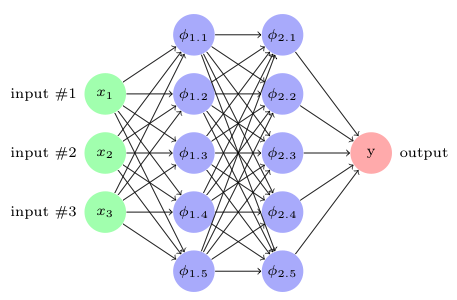

<div dir=rtl>
    על ידי הוספת שכבה אנחנו מסוגלים להעביראת הנקודות למרחב ווקטורי בו הן ניתנות להפרדה לינארית והמפריד ישמש כמו ברגרסיה לוגיסטית רגילה.
    <br/>
    לסיכום נראה שכל שכבה לינארית ניתנת לכתיבה ככפל מטריצה והוספת ביאס:
</div>

\begin{align}
Z = W \cdot x + b \\
y = f(Z)
\end{align}

In [ ]:
# taken from https://colab.research.google.com/drive/1sKJfB5YAfAUD9PU-SNDGlMdKa9M7yCcH?usp=sharing#scrollTo=qHRQVH_6jUWd

class XOR(nn.Module):
    def __init__(self):
        super(XOR, self).__init__()
        self.linear = nn.Linear(2, 2)
        self.Sigmoid = nn.Sigmoid()
        self.linear2 = nn.Linear(2, 1)

    def forward(self, input):
        x = self.linear(input)
        sig = self.Sigmoid(x)
        yh = self.linear2(sig)
        return yh

xor_network = XOR()

epochs = 100
mseloss = nn.MSELoss()
optimizer = torch.optim.Adam(xor_network.parameters(), lr = 0.03)
all_losses = []


for epoch in range(epochs):

    # input training example and return the prediction
    yhat = xor_network.forward(input_tensor)

    # calculate MSE loss
    loss = mseloss(yhat.view(-1), target)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    all_losses.append(loss)

# show weights and bias
for name, param in xor_network.named_parameters():
    if param.requires_grad:
        print(name, param.data)

In [ ]:
summary(xor_network,(40,2))


## <div dir=rtl> שאלה 3</div>


<div dir=rtl>
     בשנת 1995 קבוצת מחקר מאוניברסיטת וויסקונסין שחררה מידע על אודות 569 דגימות מנגעים ברקמת השד - חלקם ממאירים וחלקים שפירים. החוקרים הפיקו נתונים כמותיים אודות גרעיני התאים שנצפו בדגימה תחת המיקרוסקופ ומטרתם הייתה לפתח כלי אוטומטי לאיבחון ממאירות של הנגע.
    <br />
    המידע זמין להורדה בחבילה sklearn.
</div>
<div dir=rtl>
    <br />
    א. טענו את הקובץ לאובייקט מסוג DataFrame.
    הכינו את הדאטא לעבודה עם רשתות נוירונים.
</div>

<div dir=rtl>
    על מנת להכין את הדאטא בצורה טובה ננרמל כך שיתקבלו מספרים קטנים ביחס לערכים שפונקציות לא לינאריות כמו סיגמואיד וטנגנס היפרבולי יכולות לקבל לפני שהן מגיעות לרוויה:
</div>

In [ ]:
from sklearn import datasets
dataset = datasets.load_breast_cancer()

data3 = pd.DataFrame(
    
    dataset['data'],
    columns=dataset['feature_names']
    
)

data3['diagnosis'] = dataset['target'] 

df_diagnosis = data3['diagnosis']

data3 = (data3 - data3.mean()) / (data3.std() + 1e-10)

data3['diagnosis'] = df_diagnosis
data3.sample(5)


In [ ]:
print(data3.shape)

<div dir=rtl>
    ב. חלקו את הדאטא לקבוצת אימון ולקבוצת וולידציה ואמנו מודל MLP לבחירתכם.
</div>

In [ ]:
from sklearn.model_selection import train_test_split

data3_train, data3_val = train_test_split(
    data3,
    train_size = 0.8,
    stratify = data3['diagnosis'],
    random_state = 0
)

<div dir=rtl>
    כעת נרצה לבחור מודל. ברשתות נוירונים קיימות דרגות חופש רבות ואת חלקן אין שיטה לפתור למעט על ידי ניסוי. בשכבת האינפוט ובשכבת האאוטפוט אנחנו מוגבלים. שכבת האינפוט יכולה לקבל מספר ערכים כמו שקיימים בדאטא. מכיוון שכאן אנחנו מקבלים 30 פיצ'רים - אנחנו מוגבלים ל30 נוירונים בשכבה. בשכבת האאוטפוט אנחנו מנסים לסווג ל2 מחלקות (חולה או בריא). אמנם ניתן להשתמש במימוש שראינו בשאלה 1 - נוירון בודד באאוטפוט שמקבל ערכים בין 0 ל 1, אנחנו נבחר להשתמש ב One Hot Encoding. נשתמש בשני אאוטפוטים בין אפס לאחת. האאוטפוט הראשון מייצג את ההסתברות להיות בריא, והשני את ההסתברות להיות חולה.
</div>

In [ ]:
model = nn.Sequential(
    nn.Linear(30,10),
    nn.Sigmoid(),
    nn.Linear(10,2)
)

model.train()

ce_loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1)

losses = list()


for epoch in range(100):
    input = torch.Tensor(
        data3_train.drop('diagnosis', axis='columns').values
    )
    target = torch.Tensor(
        data3_train['diagnosis'].values
    )
    
    output = model(input)

    loss = ce_loss(output, target.long())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')

summary(model, (569, 30))

<div dir=rtl>
    ניבחן על קבוצת הוולידציה:
</div>

In [ ]:
model.eval()

input = torch.Tensor(
    data3_val.drop('diagnosis', axis='columns').values
)

output = model(input).argmax(dim=1).detach().numpy()


from sklearn.metrics import accuracy_score, precision_recall_fscore_support
print("Accuracy:", accuracy_score(data3_val['diagnosis'].values, output))
print("Precision, Recall, F1:", precision_recall_fscore_support(data3_val['diagnosis'].values, output, average='weighted'))


<div dir=rtl>
    זה מודל בסיסי בעולם של רשתות נוירונים. המודל הבסיסי הצליח להגיע לקלסיפיקציה מאוד גבוהה. זה זמן טוב לחשוב על יתרון ועל חיסרון של המודל. יתרון שלו הוא שהמודל יכול ללמוד ייצוג מאוד מורכב של הדאטא - הוא ימצא איך להעביר אותו למישור בו המחלקות ניתנות להפרדה בעצמו. חיסרון אחד (מיני רבים) הוא מספר הפרמטרים. במודל הפשוט שלנו יש למעלה מ300 פרמטרים - דבר שמצריך כמות דאטא מאוד גדולה לאימון.
</div>